In [7]:
import pandas as pd
import os
os.chdir(r'C:\Users\7LStar\Desktop\study\python\《Python电商数据分析实战：从电商实际案例出发洞悉数据分析全流程》随书数据源及代码\相关数据源\第8章 Python报表自动化\投放数据')

In [8]:
data=pd.read_excel('2023-12.xlsx')
data.head()

,品牌,品牌搜索人数,点击人数,支付人数
0,七喜,6896,3841,140
1,万迅,6394,3014,83
2,东方,16453,11114,1445
3,九方,53371,36682,942
4,佳禾,52686,28308,818


In [12]:
final=pd.DataFrame()
for name in os.listdir():
    df=pd.read_excel(name)
    df['日期']=name[:4]
    final=pd.concat([final,df])

final_last=final[final['日期']=='2023']
final_last['日期'].unique()

array(['2023'], dtype=object)

In [13]:
final_last.head()

,品牌,品牌搜索人数,点击人数,支付人数,日期
0,七喜,96885,46896,4692,2023
1,万迅,30070,21386,4393,2023
2,东方,354060,72224,7544,2023
3,九方,244846,103363,17097,2023
4,佳禾,6547,3257,337,2023


In [16]:
final_last.shape

(600, 5)

In [17]:
gp=final_last.groupby('品牌')[['品牌搜索人数','点击人数','支付人数']].sum().reset_index().sort_values('品牌搜索人数',ascending=False)
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数
12,双敏,1604198,571399,61244
3,九方,1552916,712139,101217
20,巨奥,1417267,512847,45790
15,商软,1002679,544392,72050
24,戴硕,920350,540284,30371


In [18]:
gp['搜索-点击转换化率']=gp['点击人数']/gp['品牌搜索人数']
gp['点击-支付转化率']=gp['支付人数']/gp['点击人数']
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转换化率,点击-支付转化率
12,双敏,1604198,571399,61244,0.356190,0.107183
3,九方,1552916,712139,101217,0.458582,0.142131
20,巨奥,1417267,512847,45790,0.361856,0.089286
15,商软,1002679,544392,72050,0.542937,0.132349
24,戴硕,920350,540284,30371,0.587042,0.056213


In [22]:
#gp.round({'搜索-点击转换化率':2,'点击-支付转化率':2})
pd.set_option('display.float_format',lambda x:'%.2f'%x)#浮点数显示两位小数
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转换化率,点击-支付转化率
12,双敏,1604198,571399,61244,0.36,0.11
3,九方,1552916,712139,101217,0.46,0.14
20,巨奥,1417267,512847,45790,0.36,0.09
15,商软,1002679,544392,72050,0.54,0.13
24,戴硕,920350,540284,30371,0.59,0.06


In [25]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [33]:
draw_data=gp.iloc[:15,:]
plt.figure(figsize=(12,7))

#初始化绘图数据
x=draw_data['搜索-点击转换化率'].to_list()
y=draw_data['点击-支付转化率'].to_list()
z=draw_data['品牌搜索人数']
text=draw_data['品牌'].to_list()

<Figure size 1200x700 with 0 Axes>

Text(0.5, 1.0, 'Top15品牌搜索分布')

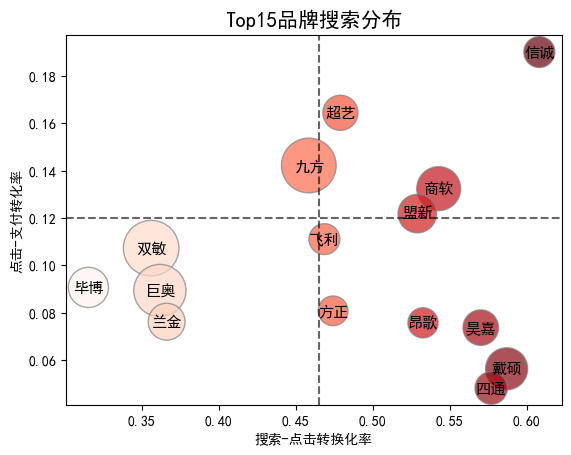

In [39]:
#绘制气泡图
plt.scatter(x,y,s = z / 1000,c=x,cmap='Reds',alpha=0.7,edgecolors='grey',linewidth=1)
#加文字标签
for i,txt in enumerate(text):
    plt.text(x=x[i],y=y[i],s=txt,size=11,horizontalalignment='center',verticalalignment='center')

#添加辅助线
plt.axhline(y=0.12,color='black',linestyle='--',alpha=0.6)
plt.axvline(x=0.465,color='black',linestyle='--',alpha=0.6)
plt.xlabel('搜索-点击转换化率')
plt.ylabel('点击-支付转化率')
plt.title('Top15品牌搜索分布',size=15)

In [40]:
draw_data.to_excel('Top15 brand.xlsx',index=False)